In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

In [6]:
results = pd.read_csv('../main/log/chull.csv', names=["algo", "experiment_id",  "threshold", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness",
                                                              "elite_size",
                                                              "distance_chull"])

In [9]:
results = results[results.dataset != '50'].reset_index(drop = True)

In [10]:
results.threshold = results.threshold.astype(int)

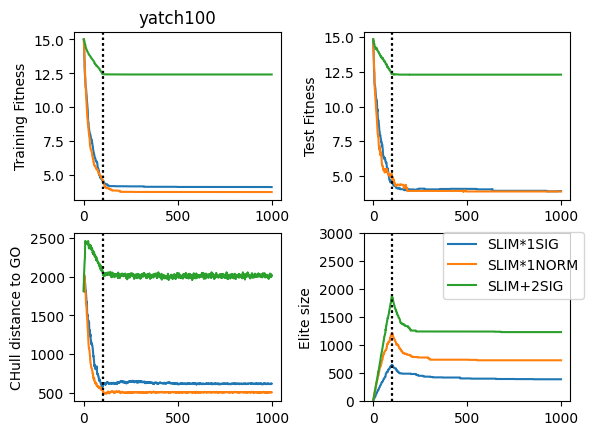

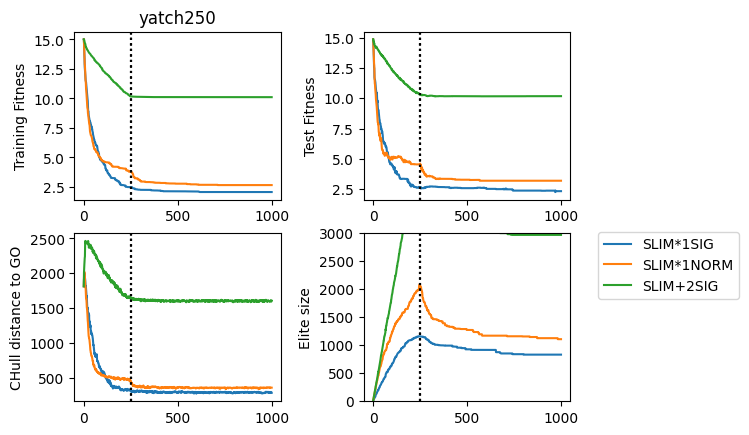

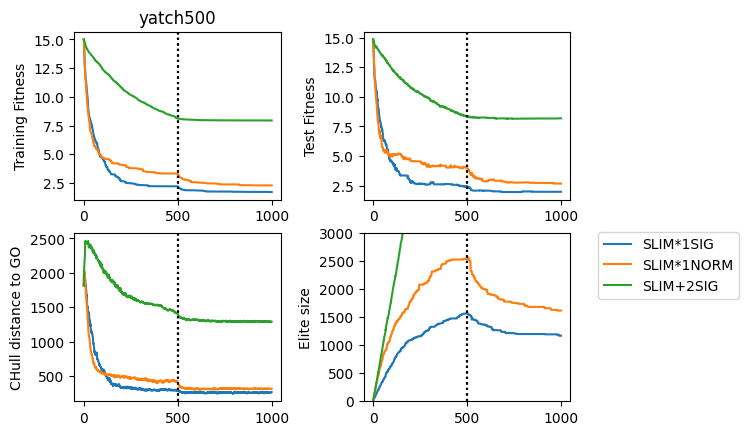

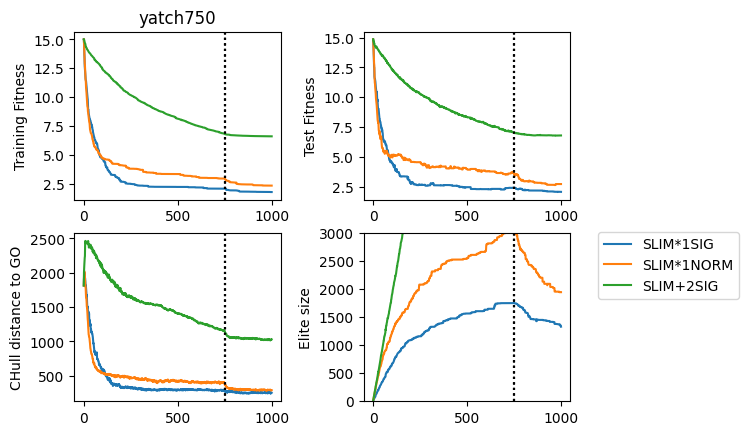

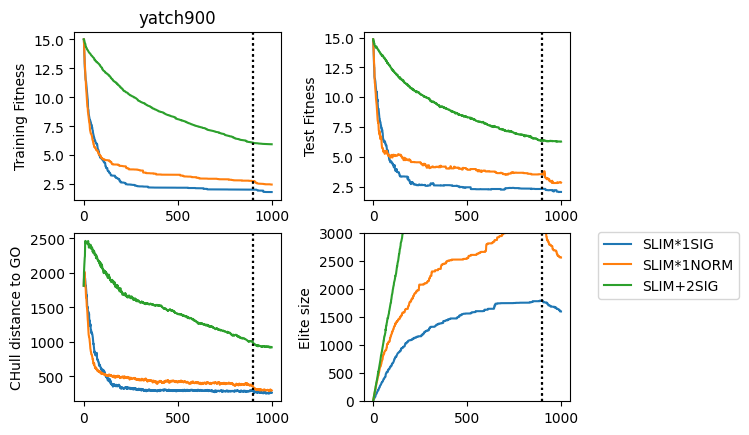

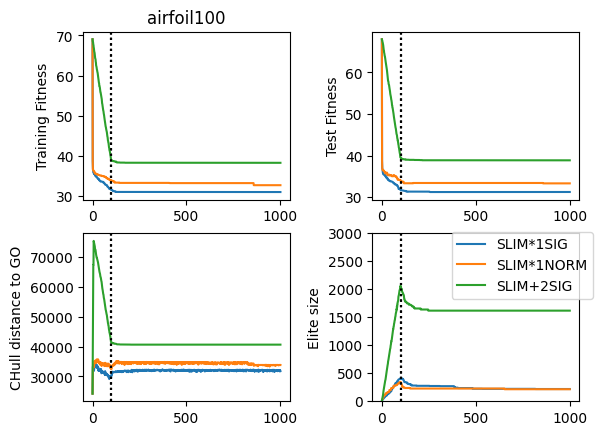

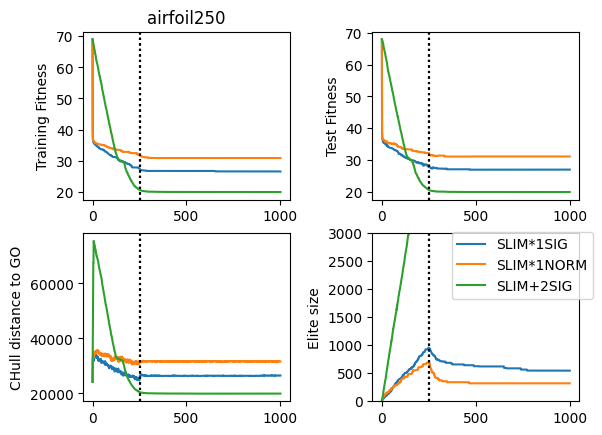

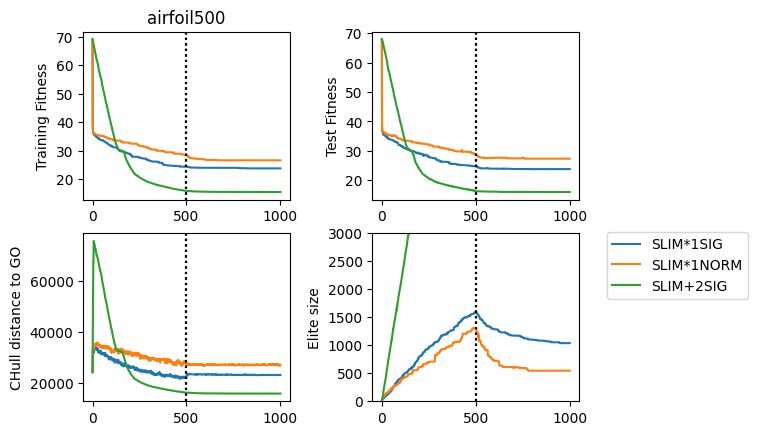

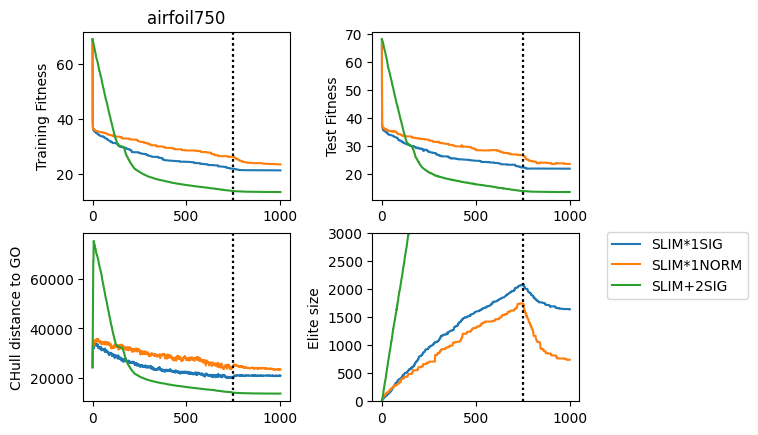

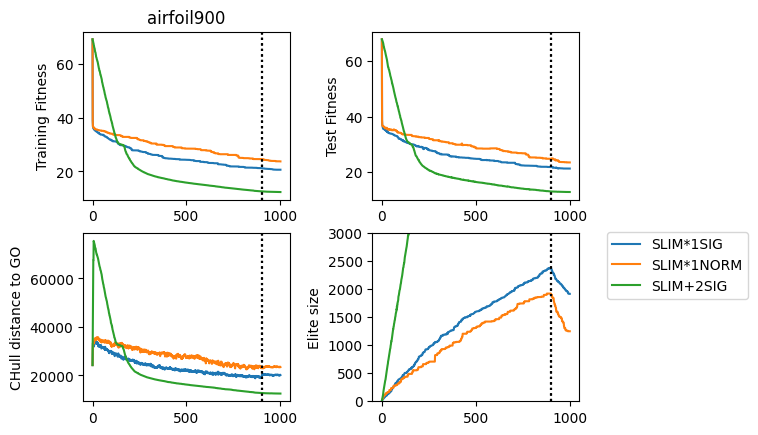

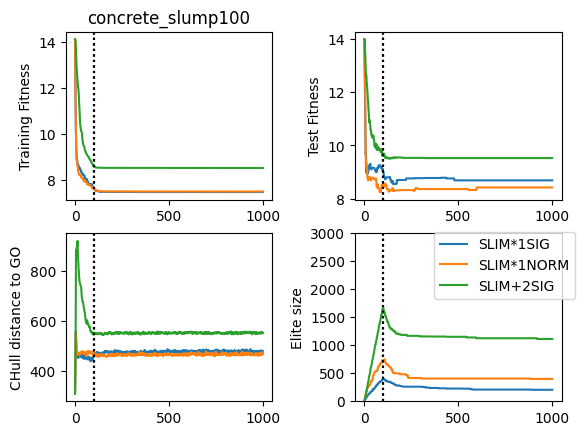

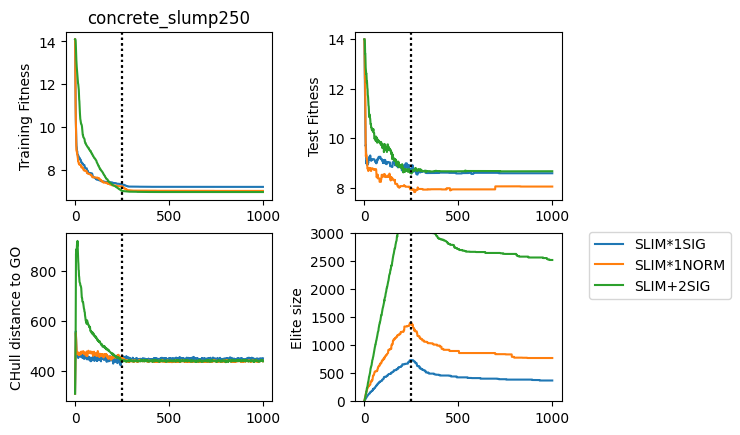

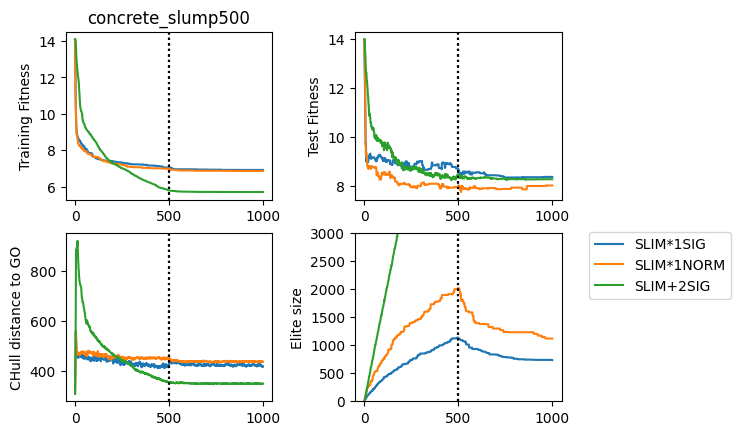

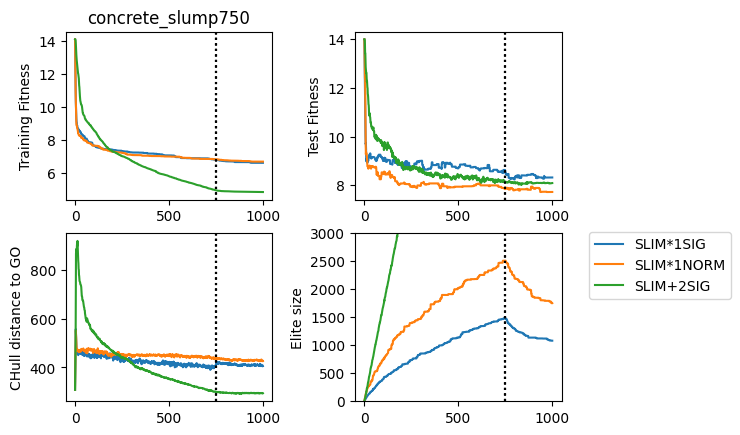

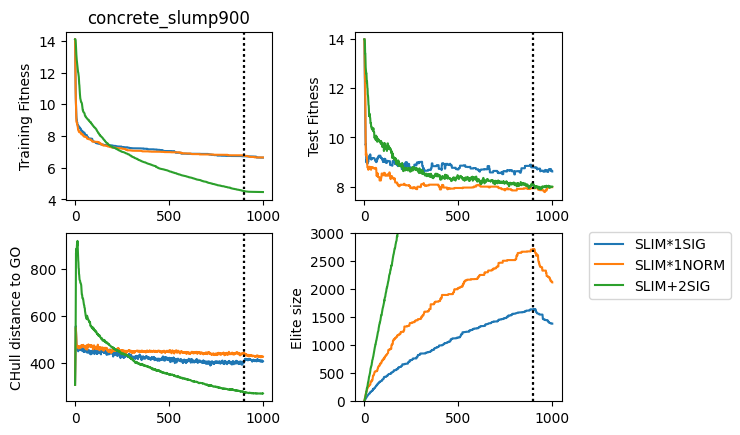

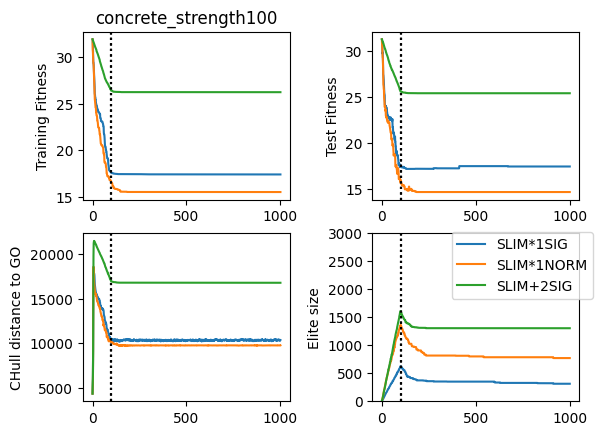

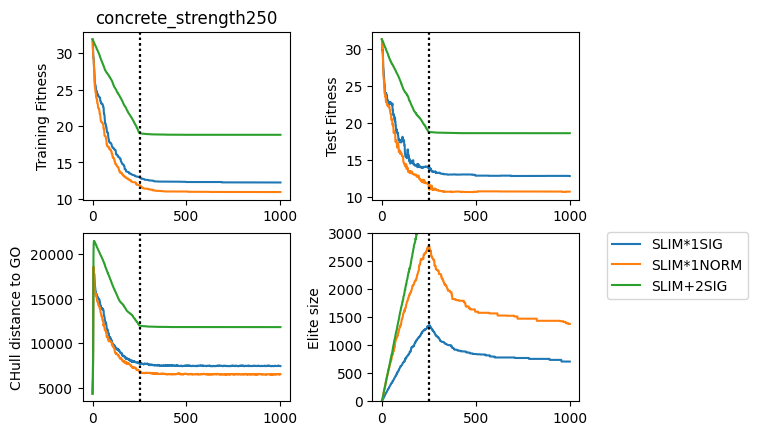

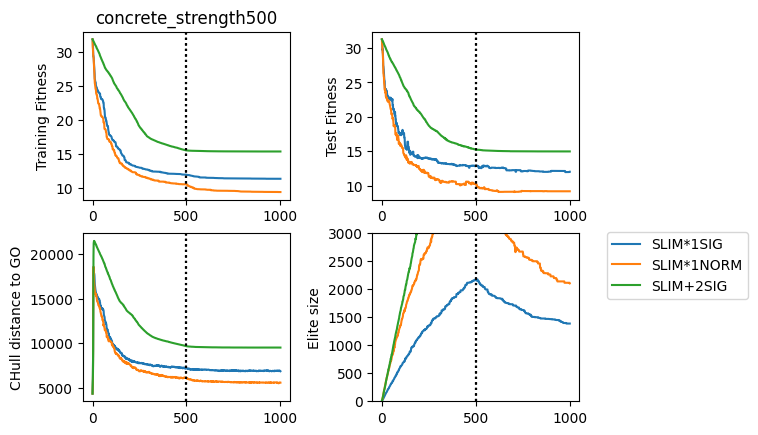

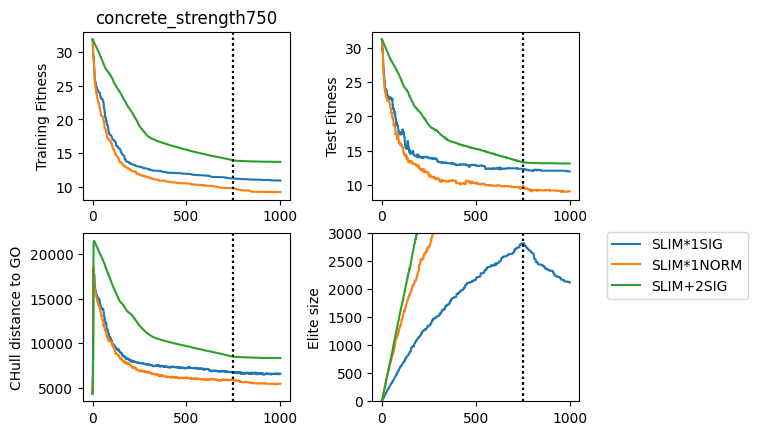

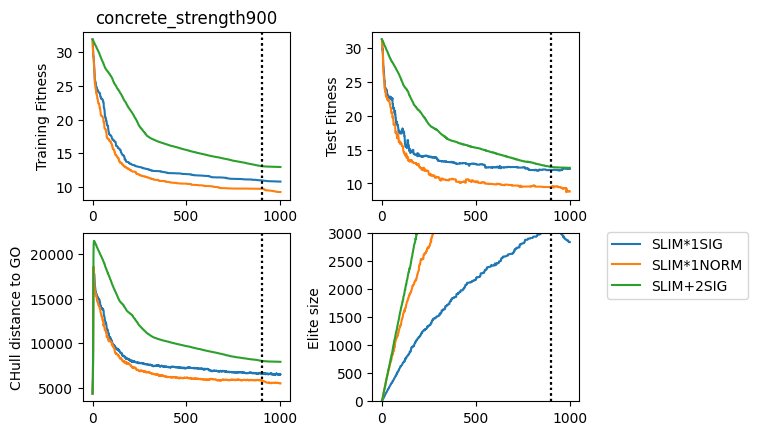

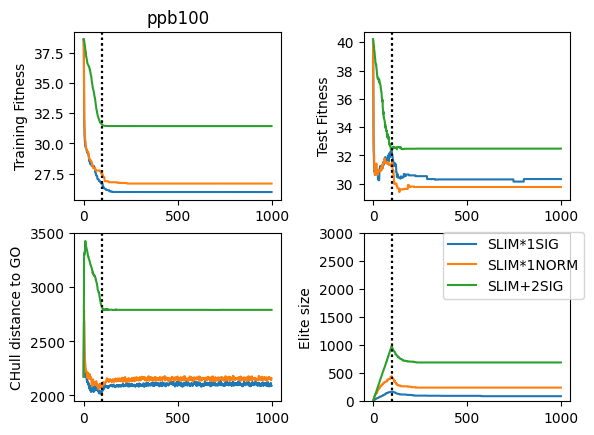

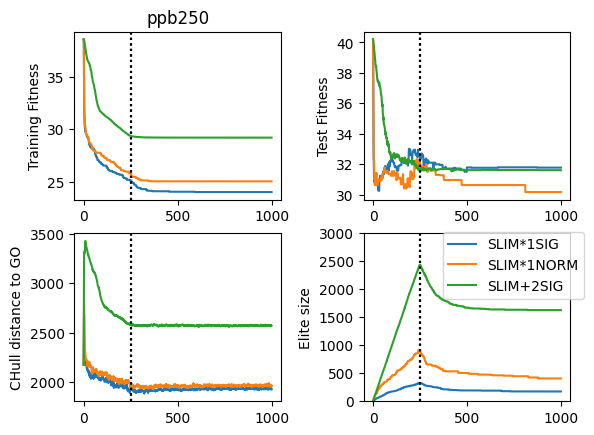

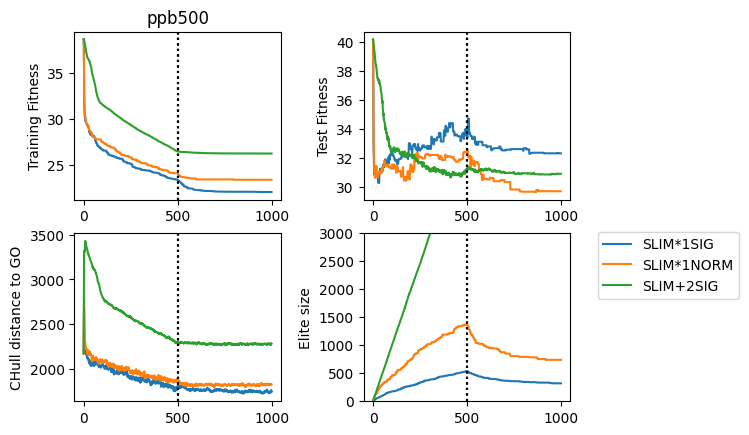

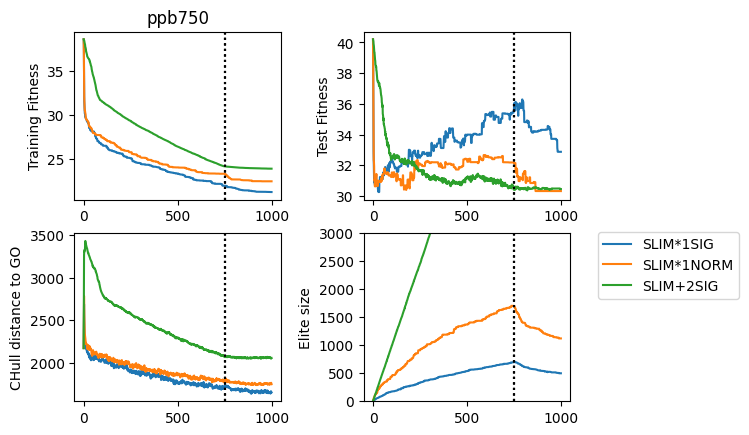

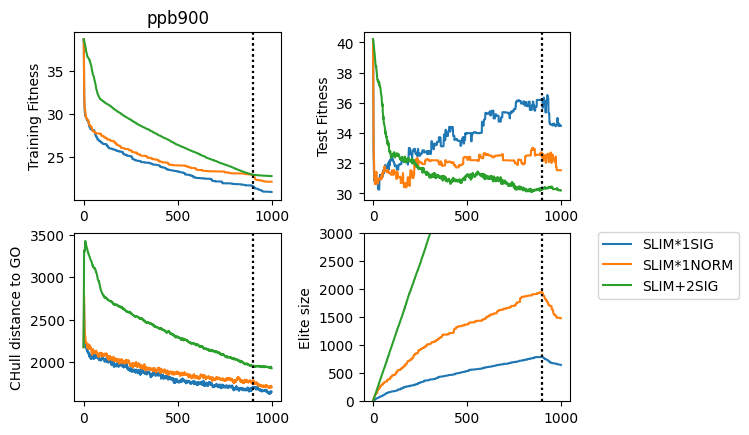

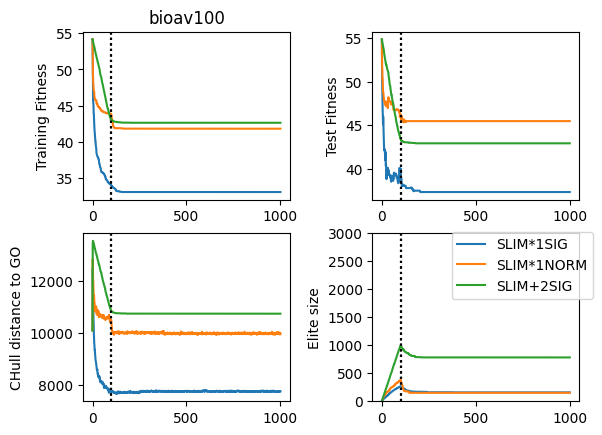

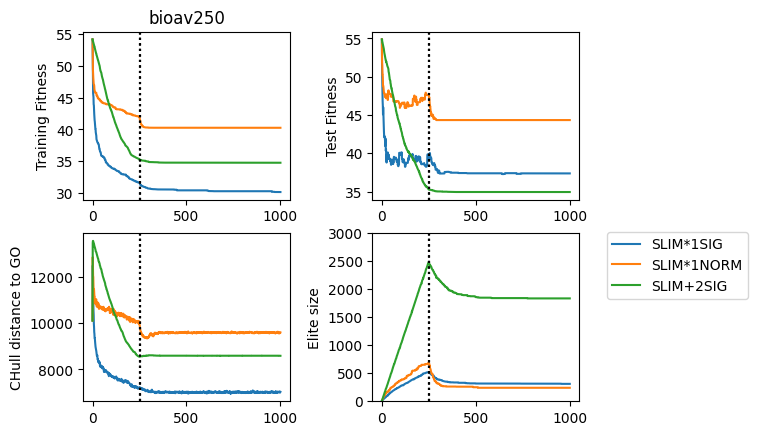

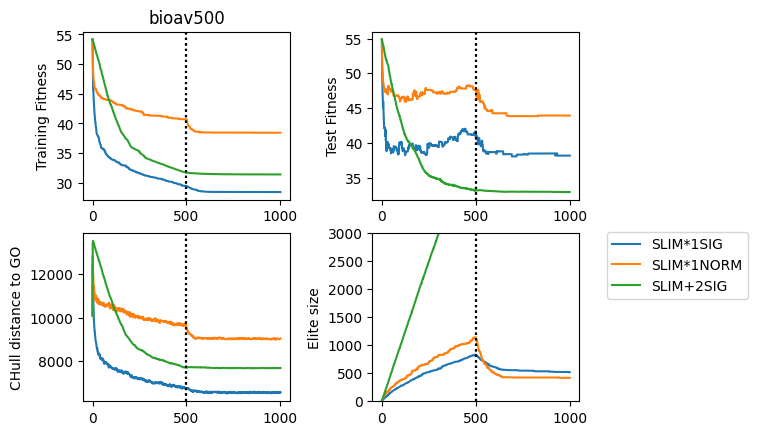

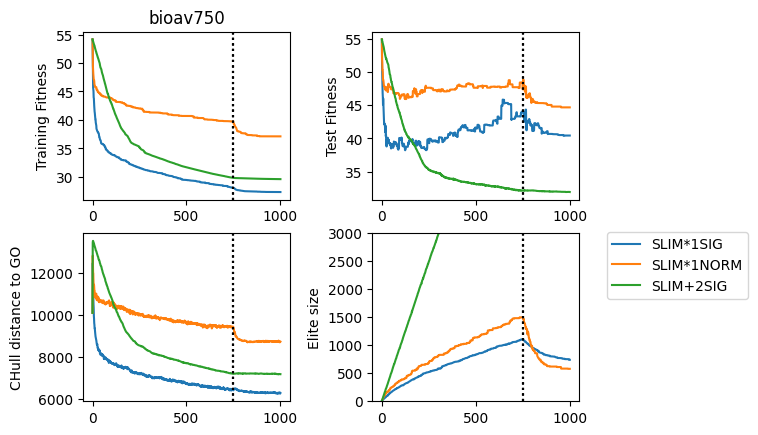

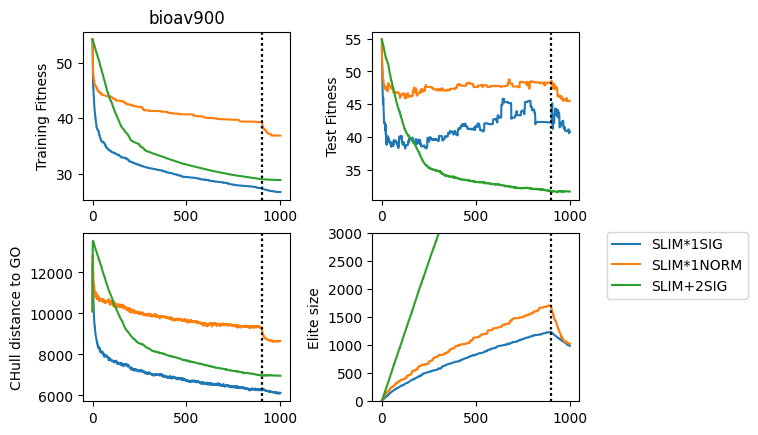

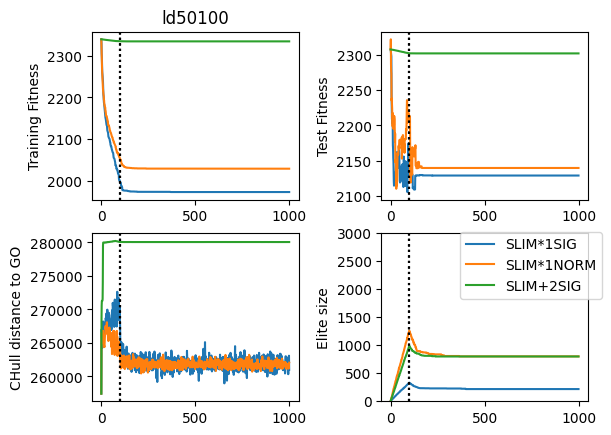

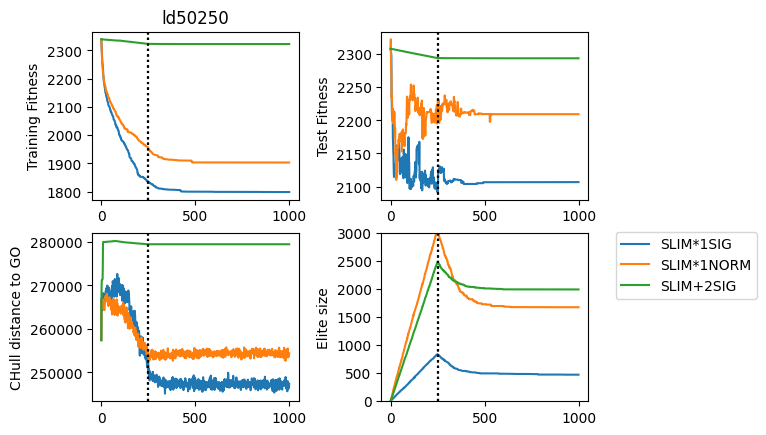

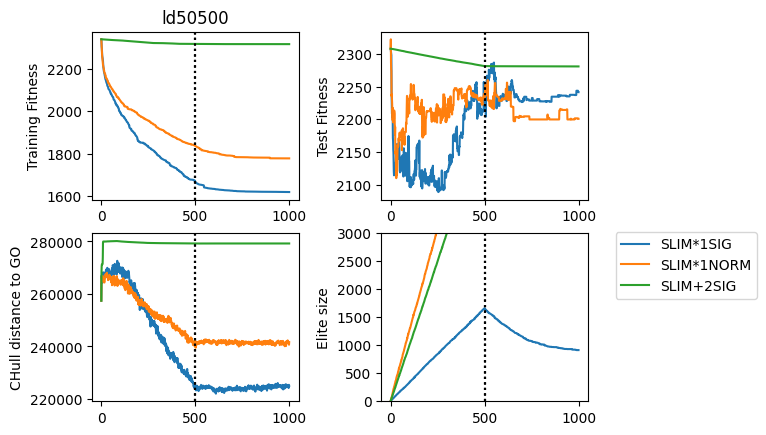

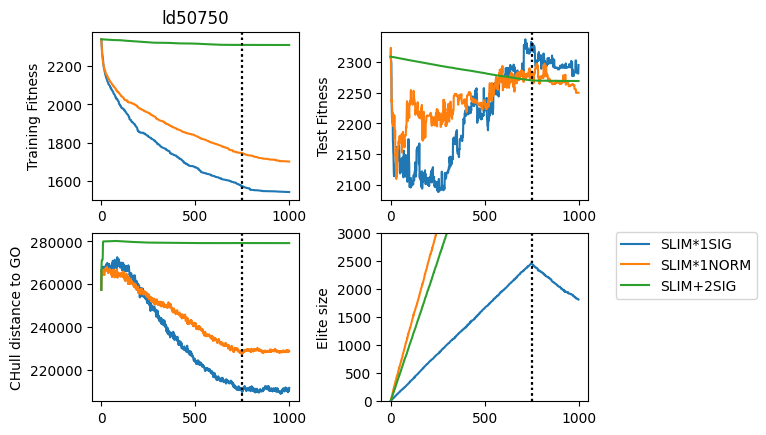

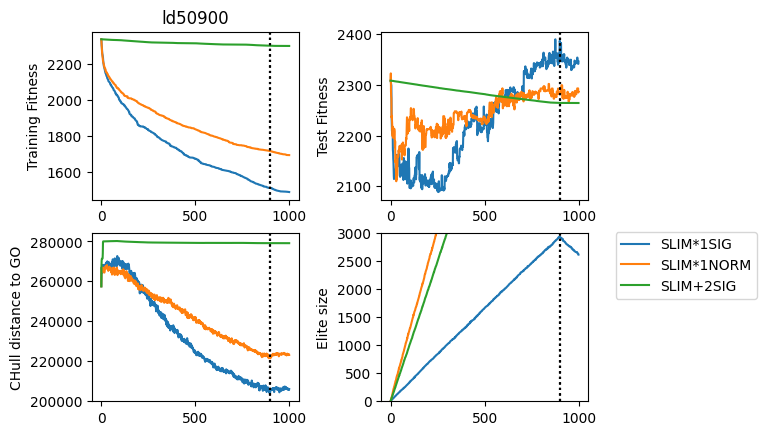

In [11]:
for data in results.dataset.unique():
    for th in results.threshold.unique():
        gs = gridspec.GridSpec(2, 2)
        gs.update( wspace=0.4)
        pl.figure()
        for algo in results.algo.unique():
        
            
            grouped = results.query("algo == @algo and dataset == @data and threshold == @th")[['generation',  "training_fitness","test_fitness", "elite_size", "distance_chull"]].groupby('generation').median()
        
        
            ax1 = pl.subplot(gs[0, 0]) 
            pl.plot(grouped.index, grouped['training_fitness'], label = algo)
            pl.axvline(x = th, linestyle = 'dotted', color = 'black')
            ax1.set_ylabel('Training Fitness')


            ax2 = pl.subplot(gs[0, 1]) 
            pl.plot(grouped.index, grouped['test_fitness'], label = algo)
            pl.axvline(x = th, linestyle = 'dotted', color = 'black')
            ax2.set_ylabel('Test Fitness')
            
            
            ax3 = pl.subplot(gs[1, 0]) 
            pl.plot(grouped.index, grouped['distance_chull'], label = algo)
            pl.axvline(x = th, linestyle = 'dotted', color = 'black')
            ax3.set_ylabel('CHull distance to GO')
            
            ax3 = pl.subplot(gs[1, 1]) #1,1 
            pl.plot(grouped.index, grouped['elite_size'], label = algo)
            pl.axvline(x = th, linestyle = 'dotted', color = 'black')
            ax3.set_ylim(0, 3000)
            ax3.set_ylabel('Elite size')
            



        ax1.set_title(data + str(th))
        ax3.legend(bbox_to_anchor=(1.1, 1.05))
        plt.show()